## Logistic Regression Quick start

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import math

## Load the data

In [44]:
url='https://raw.githubusercontent.com/Ajay-user/ML-DL-RL-repo/master/Classification%20Problems/Dataset/Facebook_Ads.csv'
ad_df = pd.read_csv(url)
ad_df.head()

Names                                             emails  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Time Spent on Site       Salary  Clicked  
0      Bulgaria           25.649648  55330.06006        0  
1        Belize           32.456107  79049.07674        1  
2       Algeria           20.945978  41098.60826        0  
3  Cook Islands           54.039325  37143.35536        1  
4        Brazil           34.249729  37355.11276        0

## Explore the data

In [45]:
ad_df.describe().iloc[:3,:]

Time Spent on Site        Salary     Clicked
count          499.000000    499.000000  499.000000
mean            32.920178  52896.992469    0.501002
std              9.103455  18989.183150    0.500501

In [46]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 17.6+ KB


## Visualize the data

<AxesSubplot:xlabel='Time Spent on Site', ylabel='Salary'>

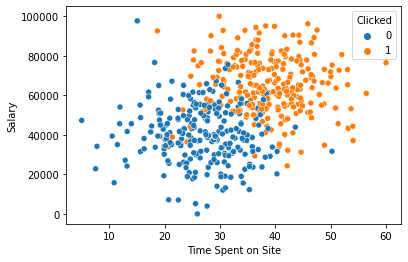

In [47]:
sns.scatterplot(x='Time Spent on Site', y='Salary', hue='Clicked', data=ad_df)

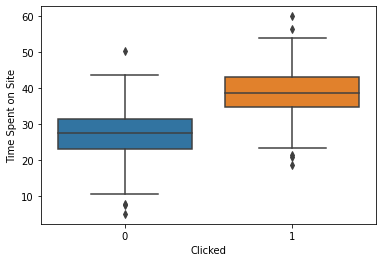

In [48]:
sns.boxplot(x='Clicked', y='Time Spent on Site', data=ad_df);

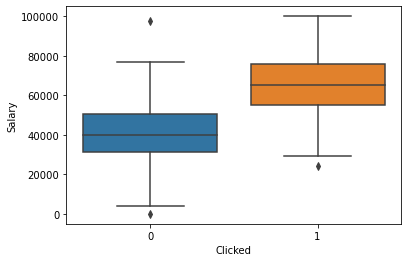

In [49]:
sns.boxplot(x='Clicked', y='Salary', data=ad_df);

## Features and Labels

In [50]:
X = ad_df.drop(columns=['Names','emails','Country','Clicked'])
y = ad_df['Clicked']

print('Shape of Independent variable',X.shape)
print('Shape of Dependent variable',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('Shape of Training data X',X_train.shape)
print('Shape of Training data y',y_train.shape)
print('Shape of Testing data X',X_test.shape)
print('Shape of Testing data y',y_test.shape)

Shape of Independent variable (499, 2)
Shape of Dependent variable (499,)
Shape of Training data X (374, 2)
Shape of Training data y (374,)
Shape of Testing data X (125, 2)
Shape of Testing data y (125,)


## Modeling and making prediction

In [76]:
# model instantiation
log_reg = LogisticRegression()
# training
log_reg.fit(X_train, y_train)
# making predictions on test set
y_preds = log_reg.predict(X_test)

## Model Evaluation

In [77]:
print(classification_report(y_test, y_preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.50      1.00      0.66        62

    accuracy                           0.50       125
   macro avg       0.25      0.50      0.33       125
weighted avg       0.25      0.50      0.33       125



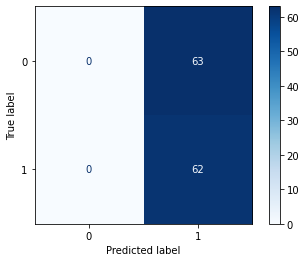

In [78]:
plot_confusion_matrix(log_reg, X_test, y_test, cmap=plt.cm.Blues);

## Model Improvement

its a good practice to normalize the features that have different scales and range.
This is important because the features are multiplied by model weights so the scale of the output and the scale of the gradient are affected by the scale of the inputs 

### Preprocessing

In [79]:
features = ['Time Spent on Site', 'Salary']

scaler = StandardScaler()

transformer = ColumnTransformer(transformers=[
    ('scale', scaler, features)
])

X_train_transformed = transformer.fit_transform(X_train)

X_test_transformed = transformer.transform(X_test)

### Modeling and making predictions

In [80]:
# model instance
model = LogisticRegression()
# training
model.fit(X_train_transformed, y_train)
# making prediction
predictions = model.predict(X_test_transformed)

### Evaluation

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.90      0.92      0.91        62

    accuracy                           0.91       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.91      0.91       125



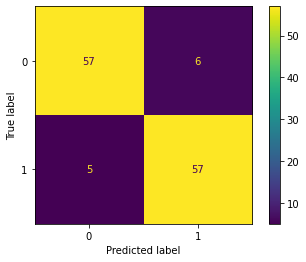

In [82]:
plot_confusion_matrix(model, X_test_transformed, y_test);

In [83]:
conf_mat = confusion_matrix(y_test, predictions)
[[TN, FP],[FN, TP]] = conf_mat

In [84]:
# ACCURACY

accuracy = (TP+TN) / (TP+TN+FP+FN)

print('Model Accuracy', accuracy)

Model Accuracy 0.912


In [85]:
# PRECISION

precision_1 = TP / (TP + FP)

precision_0 = TN / (TN + FN)

print('Model precision predicting class 1 :',precision_1)
print('Model precision predicting class 0 :',precision_0)


Model precision predicting class 1 : 0.9047619047619048
Model precision predicting class 0 : 0.9193548387096774


In [86]:
# RECALL

recall_1 = TP / (TP + FN)
recall_0 = TN / (TN + FP)

print('Recall predicting class 1 :',recall_1)
print('Recall predicting class 0 :',recall_0)

Recall predicting class 1 : 0.9193548387096774
Recall predicting class 0 : 0.9047619047619048


## Visualize Predicition

In [87]:
x = np.arange(X_test_transformed[:, 0].min()-1, X_test_transformed[:, 0].max()+1, step=0.01)
y = np.arange(X_test_transformed[:, 1].min()-1, X_test_transformed[:, 1].max()+1, step=0.01)

xx, yy = np.meshgrid(x, y)

data_points = pd.DataFrame(data={'Time Spent on Site':xx.ravel(), 'Salary': yy.ravel()}) 
preds = model.predict(data_points)

zz = preds.reshape(xx.shape)


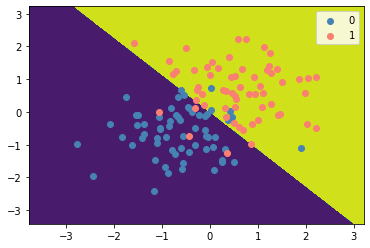

In [88]:
plt.contourf(xx,yy,zz)
plt.scatter(X_test_transformed[y_test==0, 0], X_test_transformed[y_test==0, 1], color='steelblue', label='0')
plt.scatter(X_test_transformed[y_test==1, 0], X_test_transformed[y_test==1, 1], color='salmon', label='1')
plt.legend()
plt.show()